VARIABLE DESCRIPTIONS:

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:

Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
Age is in Years; Fractional if Age less than One (1)
If the Age is estimated, it is in the form xx.5
Fare is in Pre-1970 British Pounds ()
Conversion Factors: 1 = 12s = 240d and 1s = 20d

#### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

#### Import/ Read Data

In [2]:
titanic_train_df = pd.read_csv("Titanic_train.csv")
titanic_test_df = pd.read_csv("Titanic_test.csv")

In [3]:
titanic_train_df.shape

(891, 12)

In [4]:
titanic_test_df.shape

(418, 11)

In [5]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic_test_df.shape

(418, 11)

In [8]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
titanic_train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### EDA

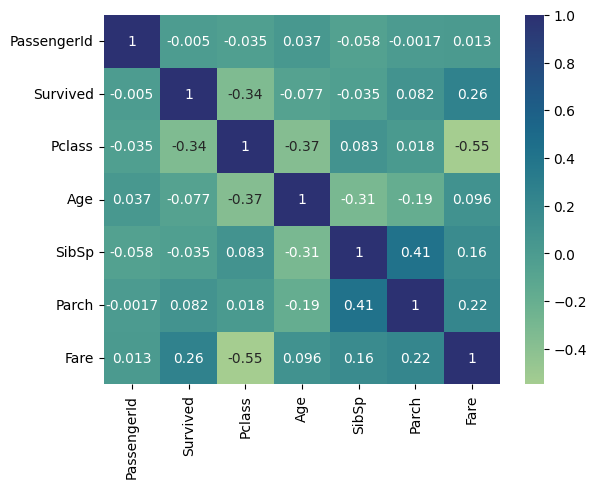

In [12]:
sns.heatmap(titanic_train_df.select_dtypes(np.number).corr(),annot=True,cmap='crest')
plt.show()

We can see that there is some co-relation between the output feature'survived' with 'Fare' column

<Axes: xlabel='Age', ylabel='Count'>

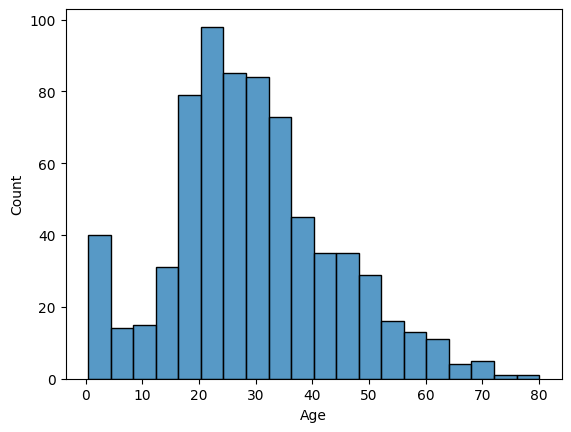

In [13]:
sns.histplot(data = titanic_train_df,x = 'Age' )

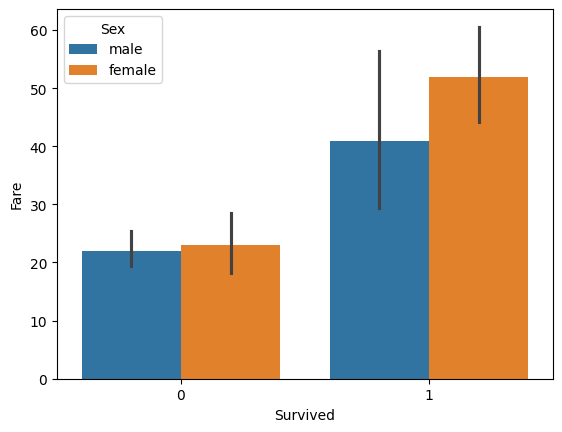

In [14]:
sns.barplot(titanic_train_df,x = 'Survived',y = 'Fare',hue = 'Sex')
plt.show()

The above graph, clearly shows that the survival rate is more for the passengers who has paid more fare as compared to the passengers who has paid less fare.

[Text(0, 0, '109'), Text(0, 0, '233')]

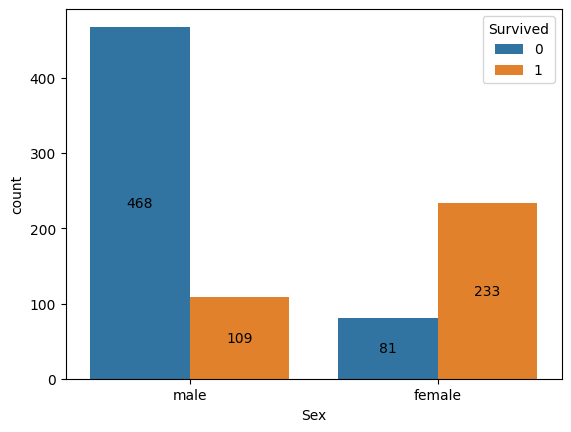

In [15]:
ax = sns.countplot(titanic_train_df,x = 'Sex',hue = 'Survived')
ax.bar_label(ax.containers[0],label_type='center')
ax.bar_label(ax.containers[1],label_type='center')

Survival rate for Female is more as compared to Male.


### Data Preprocessing
 - Handling missing values

In [16]:
titanic_train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic_test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
titanic_train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
## Mean imputation for missing values in numerical column
titanic_train_df['Age'] = titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean())

In [20]:
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(titanic_train_df['Age'].mean())

In [21]:
titanic_train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
titanic_train_df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [23]:
## Mode imputation for missing values in numerical column
titanic_train_df['Cabin'] = titanic_train_df['Cabin'].fillna('G6')

In [24]:
titanic_test_df['Cabin'] = titanic_test_df['Cabin'].fillna('G6')

In [25]:
titanic_train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
titanic_train_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [27]:
titanic_train_df['Embarked'] = titanic_train_df['Embarked'].fillna('S')

In [28]:
titanic_test_df['Embarked'] = titanic_test_df['Embarked'].fillna('S')

In [29]:
titanic_train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [30]:
titanic_test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

All the missing values has been replaced and now there are no null values in our dataset

In [31]:
titanic_train_df.drop(['Name','Ticket','Fare'],axis=1,inplace=True)

In [32]:
titanic_train_df.drop(['Cabin'],axis=1,inplace=True)

In [33]:
titanic_train_df.head()

## PassengerId has been dropped from the dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [34]:
titanic_test_df.drop(['Name','Ticket','Fare'],axis=1,inplace=True)

In [35]:
titanic_test_df.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [36]:
titanic_test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


- Encode Categorical Variables

In [37]:
##Perform One hot encoding on Training Data
categorical_col_train = titanic_train_df.select_dtypes(object).columns
categorical_col_train

Index(['Sex', 'Embarked'], dtype='object')

In [38]:
encoder = OneHotEncoder(sparse_output=False)

In [39]:
encode_cate_col_train = encoder.fit_transform(titanic_train_df[categorical_col_train])

In [40]:
encode_cate_col_train

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [41]:
encoded_titanic_train_df = pd.DataFrame(encode_cate_col_train,columns= encoder.get_feature_names_out(categorical_col_train))

In [42]:
new_titanic_train_df = pd.concat([titanic_train_df.drop(['Sex','Embarked'],axis = 1),encoded_titanic_train_df],axis=1)

In [43]:
titanic_train_df.drop(['PassengerId'],axis = 1,inplace=True)

In [44]:
new_titanic_train_df = pd.concat([titanic_train_df,encoded_titanic_train_df],axis=1)

In [45]:
new_titanic_train_df = pd.concat([titanic_train_df.drop(['Sex','Embarked'],axis = 1),encoded_titanic_train_df],axis=1)

In [46]:
new_titanic_train_df

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,1.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,1.0,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,0.0,1.0,1.0,0.0,0.0


In [47]:
##Perform One hot encoding on Testing Data
categorical_col_test = titanic_test_df.select_dtypes(object).columns
categorical_col_test

Index(['Sex', 'Embarked'], dtype='object')

In [48]:
encoder = OneHotEncoder(sparse_output=False)
encoded_cate_col_test = encoder.fit_transform(titanic_test_df[categorical_col_test])
encoded_cate_col_test

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [49]:
encode_titanic_test_df = pd.DataFrame(encoded_cate_col_test,columns=encoder.get_feature_names_out(categorical_col_test))

In [50]:
new_titanic_test_df = pd.concat([titanic_test_df.drop(['Sex','Embarked'],axis = 1),encode_titanic_test_df],axis=1)

In [51]:
new_titanic_test_df

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,0,0,0.0,1.0,0.0,1.0,0.0
1,3,47.000000,1,0,1.0,0.0,0.0,0.0,1.0
2,2,62.000000,0,0,0.0,1.0,0.0,1.0,0.0
3,3,27.000000,0,0,0.0,1.0,0.0,0.0,1.0
4,3,22.000000,1,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,29.699118,0,0,0.0,1.0,0.0,0.0,1.0
414,1,39.000000,0,0,1.0,0.0,1.0,0.0,0.0
415,3,38.500000,0,0,0.0,1.0,0.0,0.0,1.0
416,3,29.699118,0,0,0.0,1.0,0.0,0.0,1.0


#### Model Building

In [57]:
x = new_titanic_train_df.drop('Survived',axis =1)
y = new_titanic_train_df['Survived']

In [58]:
## Divide data into training and tesing 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)

In [59]:
model = LogisticRegression()

In [60]:
model.fit(x_train,y_train)

s:\DataScience\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Evaluation:

In [61]:
y_pred = model.predict(x_test)

In [67]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy Score:  0.8156424581005587
Precision Score:  0.8028169014084507
F1 Score:  0.7755102040816326
Recall Score:  0.75
Confusion Matrix:  [[89 14]
 [19 57]]


In [69]:
model.coef_

array([[-0.98311299, -0.03884263, -0.324469  ,  0.00993448,  1.31566933,
        -1.30626913,  0.17221517,  0.08061745, -0.24343241]])